In [35]:
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def fit_positive_linear(x, y):
    x = np.asarray(x)
    y = np.asarray(y)
    penalty_weight = 10
    
    # Loss function (mean squared error)
    def loss(params):
        a, b = params
        violation = np.maximum(0, y - (a * x + b))  # Capture violations
        penalty = penalty_weight * np.sum(violation ** 2)  # Stronger penalty for violations
        return np.sum((a * x + b - y) ** 2) + penalty
    
    # Initial guess (can be set to 1,1)
    initial_guess = [0.0, 0.0]
    
    # Constraints a > 0, b > 0
    bounds = [(1e-6, None), (1e-6, None)]  # Small threshold to avoid zero
    
    # Run optimization
    result = minimize(loss, initial_guess, bounds=bounds)
    
    return result.x  # Returns [a, b]

Optimal parameters: L_1 = 0.0000, L_0 = 1215.6900


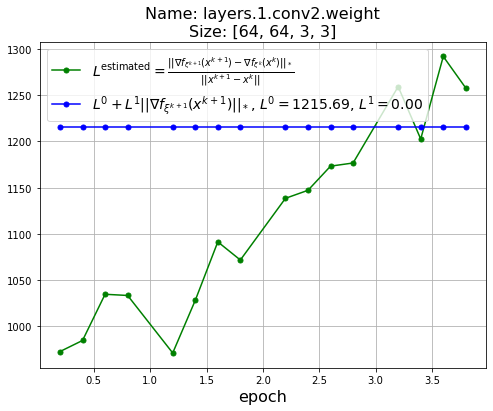

In [26]:
# Sample log file path
log_file_path = "output.txt"  # Change this to your actual log file path

# Lists to store extracted values
L_estimated_values = []
norm_grad_values = []

# Regular expression pattern to match L_estimated and norm_grad lines
pattern = re.compile(r"step:(\d+\.\d+) \(2\) L_estimated: ([\d\.]+) norm_grad: ([\d\.]+)")

step_values = []
L_estimated_values = []
norm_grad_values = []

with open(log_file_path, "r") as file:
    for line in file:
        match = pattern.search(line)
        if match:
            step_values.append(float(match.group(1)))         # step
            L_estimated_values.append(float(match.group(2)))  # L_estimated
            norm_grad_values.append(float(match.group(3)))    # norm_grad
            
half = len(step_values) // 2
step_values = step_values[:half]
L_estimated_values = L_estimated_values[:half]
norm_grad_values = norm_grad_values[:half]

# Use extracted values from log file
a, b = fit_positive_linear(norm_grad_values, L_estimated_values)
print(f"Optimal parameters: L_1 = {a:.4f}, L_0 = {b:.4f}")

# Compute vectors
y_actual = np.array(L_estimated_values)
y_predicted = a * np.array(norm_grad_values) + b
x = np.array(step_values)

# Plot results

plt.figure(figsize=(8, 6))
plt.plot(x, y_actual, 'o-', markersize=5, label=r'$L^{\mathrm{estimated}} = \frac{||\nabla f_{\xi^{k+1}}(x^{k+1}) - \nabla f_{\xi^{k}}(x^k)||_*}{||x^{k+1} - x^{k}||}$', color='green')
plt.plot(x, y_predicted, 'o-', markersize=5, 
         label = r'$L^0 + L^1 ||\nabla f_{\xi^{k+1}}(x^{k+1})||_*$' + f', $L^0 = {b:.2f}$, $L^1 = {a:.2f}$', color='blue')
plt.xlabel('epoch', fontsize=16)
plt.legend(fontsize=14)
plt.grid()
plt.title('Name: layers.1.conv2.weight\nSize: [64, 64, 3, 3]', fontsize=16)
plt.savefig('plot1.pdf', format='pdf')
plt.show()

Optimal parameters: L_1 = 0.0313, L_0 = 0.0278


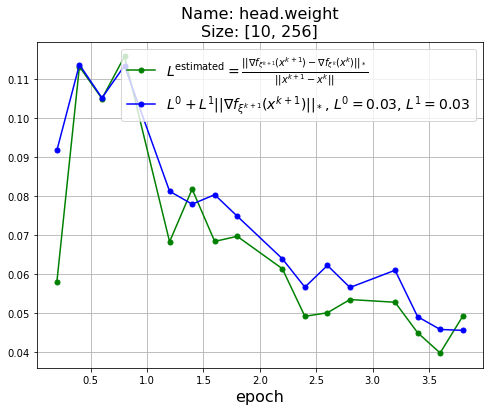

In [36]:
# Sample log file path
log_file_path = "output.txt"  # Change this to your actual log file path

# Lists to store extracted values
L_estimated_values = []
norm_grad_values = []

# Regular expression pattern to match L_estimated and norm_grad lines
pattern = re.compile(r"step:(\d+\.\d+) \(13\) L_estimated: ([\d\.]+) norm_grad: ([\d\.]+)")

step_values = []
L_estimated_values = []
norm_grad_values = []

with open(log_file_path, "r") as file:
    for line in file:
        match = pattern.search(line)
        if match:
            step_values.append(float(match.group(1)))         # step
            L_estimated_values.append(float(match.group(2)))  # L_estimated
            norm_grad_values.append(float(match.group(3)))    # norm_grad
            
half = len(step_values) // 2
step_values = step_values[:half]
L_estimated_values = L_estimated_values[:half]
norm_grad_values = norm_grad_values[:half]

# Use extracted values from log file
a, b = fit_positive_linear(norm_grad_values, L_estimated_values)
print(f"Optimal parameters: L_1 = {a:.4f}, L_0 = {b:.4f}")

# Compute vectors
y_actual = np.array(L_estimated_values)
y_predicted = a * np.array(norm_grad_values) + b
x = np.array(step_values)

# Plot results

plt.figure(figsize=(8, 6))
plt.plot(x, y_actual, 'o-', markersize=5, label=r'$L^{\mathrm{estimated}} = \frac{||\nabla f_{\xi^{k+1}}(x^{k+1}) - \nabla f_{\xi^{k}}(x^k)||_*}{||x^{k+1} - x^{k}||}$', color='green')
plt.plot(x, y_predicted, 'o-', markersize=5, 
         label = r'$L^0 + L^1 ||\nabla f_{\xi^{k+1}}(x^{k+1})||_*$' + f', $L^0 = {b:.2f}$, $L^1 = {a:.2f}$', color='blue')
plt.xlabel('epoch', fontsize=16)
plt.legend(fontsize=14)
plt.grid()
plt.title('Name: head.weight\nSize: [10, 256]', fontsize=16)
plt.savefig('plot2.pdf', format='pdf')
plt.show()